<a href="https://colab.research.google.com/github/dr-song-summer-project/ChatBot_Preprocessing/blob/main/AI/Answer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


# 답변 Clustering 

In [ ]:
sse = []

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

path = '/gdrive/My Drive/Colab Notebooks/Src/sample_data_preprocessed_4100.xlsx'

df = pd.read_excel(path)
data = pd.DataFrame()
data['answers'] = df['답변']

def preprocessing(sentence):
    sentence =re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)
    return sentence

df['content_cleaned'] = data['answers'].apply(preprocessing)
content = df['content_cleaned'].tolist()

# CountVectrizer로 토큰화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

# l2 정규화
X = normalize(X)

# 군집화 할 그룹의 갯수 정의
n_clusters = 20

# k-means 알고리즘 적용
kmeans = KMeans(n_clusters=n_clusters).fit(X)

# trained labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# labels에 merge
df['labels'] = labels

df.loc[df['labels']==1,['content_cleaned', 'labels']]

,content_cleaned,labels
189,피임약을 꾸준히 드셨다고 하면 임신의 가능성은 없어 보입니다 너무 걱정하지 않으...,1
206,임신 가능성은 아주 낮아 보입니다 피임약을 복용하는 기준으로 일반적인 임신 확률...,1
263,피임약을 언제부터 복용하신 지 몰라 정확한 답변은 어렵지만 부정출혈의 가능성이 ...,1
447,피임약의 복용수칙을 지키지 않았다면 피임이 될 확률이 낮아질 수 있을 가능성이 높...,1
457,이전에 피임약을 정해진 스케줄로 정상적으로 복용하였고 휴약기에 이벤트가 있었다면 ...,1
...,...,...
4069,생리 주기가 불규칙하여 정확히 상담해 드리기 어렵겠습니다 우선 중간에 출혈은 정...,1
4093,말씀하신 hcg 가 확인되었다면 임신의 가능성은 없어 보입니다 굳이 더 걱정하...,1
4114,현재 적어주신 내용대로라면 임신의 가능성은 없어 보입니다 굳이 걱정하지 않으셔도...,1
4120,현실적으로 임신의 가능성은 현저히 낮습니다만 임신이 아니다라고 확인을 ...,1


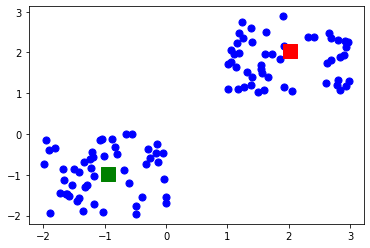

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# X= -2 * np.random.rand(100,2)
# X1 = 1 + 2 * np.random.rand(50,2)
# X[50:100, :] = X1

Kmean = KMeans(n_clusters=5)
Kmean.fit(X)

Kmean.cluster_centers_

plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

ValueError: ignored

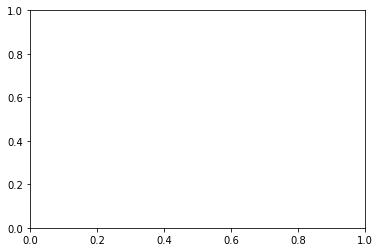

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def elbow(X, n):
  for i in range(1, n+5):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(X)
    sse.append(km.inertia_)


n = 68
elbow(X, n)
plt.plot(range(1, n+5), sse, marker='o')
plt.xlabel('클러스터 갯수')
plt.ylabel('SSE')
plt.show()

In [ ]:
df_clustering = df[['content_cleaned', 'labels']]

# df.to_excel("/content/clusted_all.xlsx", sheet_name="질문 포함")
# df_clustering.to_excel("/content/clustered_answer.xlsx", sheet_name="답변 클러스터링")

with pd.ExcelWriter('/content/clustered.xlsx') as writer:
    df_clustering.to_excel(writer, sheet_name='clustered_answer')
    df.to_excel(writer, sheet_name='clusted_all')



In [ ]:
with pd.ExcelWriter('/content/clustered_종류.xlsx') as writer:  
  for i in range(0, n_clusters):
    df_sample = df.loc[df['labels']==i,['질문','content_cleaned', 'labels']]
    df_sample.to_excel(writer, sheet_name='Label 1')

# 요약 답변 클러스터링

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

path = '/gdrive/My Drive/Colab Notebooks/Src/sample_annotation.xlsx'

df = pd.read_excel(path)
data = pd.DataFrame()
data['answers'] = df['질문 요약']

def preprocessing(sentence):
    sentence =re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)
    return sentence

df['content_cleaned'] = data['answers'].apply(preprocessing)
content = df['content_cleaned'].tolist()

# CountVectrizer로 토큰화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

# l2 정규화
X = normalize(X)

# 군집화 할 그룹의 갯수 정의
n_clusters = 2

# k-means 알고리즘 적용
kmeans = KMeans(n_clusters=n_clusters).fit(X)

# trained labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# labels에 merge
df['labels'] = labels

df.loc[df['labels']==1,['content_cleaned', 'labels']]

,content_cleaned,labels
1,휴약기를 가 지지 않아도 피임 효과가 있나요,1
4,일에서 일까지 피임약을 복용하고 일째 만 다른 피임법을 병용 한다면 이전에...,1
6,휴약 기간을 가진 후에 오늘부터 다시 피임약을 먹고 있습니다 그러면 지금은 피임 효...,1
7,피임약 생리 첫날에 복용할 경우 팩 다 먹고 난 뒤부터 만 피임 효과가 발생하는 ...,1
8,생리 시작 후 일주일이 지나기 전에 먹어도 효과가 백프로 있나요,1
...,...,...
191,약을 피임약과 함께 복용하여도 피임 효과에는 지장이 없는지,1
193,구토을 하면 약이 흡수되지 않아서 피임 효과 없다는데 임신 가능성 있을까요,1
194,미루는 목적으로 경구 피임약을 먹을 땐 생리 시작일 일 이내 부터 약을 먹으라고 ...,1
195,생리 미루는 목적으로 피임약을 먹으려는데요 몇일 전쯤 먹어야 효과가 있나요,1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# X= -2 * np.random.rand(100,2)
# X1 = 1 + 2 * np.random.rand(50,2)
# X[50:100, :] = X1

kmeans = KMeans(n_clusters=n_clusters).fit(X)

kmeans.cluster_centers_


array([[0.00293704, 0.00153382, 0.00321736, ..., 0.00400676, 0.        ,
        0.00143885],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00463864,
        0.        ]])

In [ ]:
df_clustering = df[['content_cleaned', 'labels']]

# df.to_excel("/content/clusted_all.xlsx", sheet_name="질문 포함")
# df_clustering.to_excel("/content/clustered_answer.xlsx", sheet_name="답변 클러스터링")

with pd.ExcelWriter('/content/clustered_annotation.xlsx') as writer:
    df_clustering.to_excel(writer, sheet_name='clustered_answer')
    df.to_excel(writer, sheet_name='clusted_all')


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

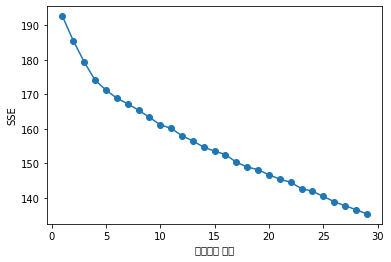

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

smaple = []

def elbow(X, n):
  for i in range(1, n):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(X)
    smaple.append(km.inertia_)
  plt.plot(range(1, n), smaple, marker='o')
  plt.xlabel('클러스터 갯수')
  plt.ylabel('SSE')
  plt.show()

elbow(X, 30)